<a href="https://colab.research.google.com/github/elenagonzalezrebollo/AprendizajeAutomatico/blob/main/Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


https://www.kaggle.com/datasets/igmoncan/hoteles-en-valencia?resource=download&select=valenciahoteles.csv

In [96]:
data = pd.read_csv('valenciahoteles.csv', encoding='latin-1')
data=data.drop(['Nombre', 'Distrito', 'Fecha', 'Dirección', 'CP', 'lat', 'long'], axis=1)
data.head()


,Valoración,Número de comentarios,Precio
0,7.9,767,38.0
1,8.0,206,37.0
2,7.4,1458,27.5
3,8.8,1009,79.0
4,8.1,3441,84.0


In [97]:
data.columns

Index(['Valoración', 'Número de comentarios', 'Precio'], dtype='object')

In [98]:
train_targets=data.Valoración
test_targets=data.Valoración
data=data.drop(['Valoración'], axis=1)
train_data=data
test_data=data


#(train_data, train_targets), (test_data, test_targets) =  data

In [99]:
train_data.shape

(3959, 2)

In [100]:
test_data.shape

(3959, 2)

In [101]:
train_targets.shape

(3959,)

In [102]:
test_targets.shape

(3959,)

In [ ]:
#train_data[3450]

In [ ]:
# Los 3959 precios medios de los datos de test en miles de $
#test_targets

In [88]:
# 1. Separamos los datos de entrenamiento con los datos de test
#train_data = train_data[:3000]
#test_data = train_data[3001:]
#partial_train_targets = train_targets[:3000]
#partial_eval_train_targets = train_targets[3001:]

In [103]:
# Normalizamos basándonos en las características
##############################################
# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_data.mean(axis=0)
print("##### Media de las 13 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_data -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_data.std(axis=0)
print("##### Desviación estandar de las 13 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_data /= std
#print("##### Datos de entrenamiento normalizados para la primera casa ##### ")
#print(train_data[0])

# ¡¡IMPORTANTE!!: USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
test_data -= mean
test_data /= std
#print("##### Datos de test normalizados (de la primera casa) con la media y la desviación estándar de los datos de entrenamiento ##### ")
#print(test_data[0])

##### Media de las 13 características de los datos de entrenamiento ##### 
Número de comentarios    2193.210154
Precio                    140.196262
dtype: float64
##### Desviación estandar de las 13 características de los datos de entrenamiento ##### 
Número de comentarios    2021.854114
Precio                     84.133629
dtype: float64


In [104]:
train_data.shape[1]

2

In [105]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo 
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

In [106]:
# 2. Hacer aquí las particiones de los datos de entrenamiento
partial_train_data = train_data[:2500]
partial_eval_train_data = train_data[2501:]
partial_train_targets = train_targets[:2500]
partial_eval_train_targets = train_targets[2501:]

In [107]:
# 2. Entrenar el modelo con 25 épocas y un batch_size=1
mymodel = build_model()

In [108]:
history = mymodel.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=25, batch_size=1)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3391 - mean_absolute_error: 0.6417 - val_loss: 0.6169 - val_mean_absolute_error: 0.6530
Epoch 2/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4331 - mean_absolute_error: 0.4991 - val_loss: 0.4814 - val_mean_absolute_error: 0.5533
Epoch 3/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4318 - mean_absolute_error: 0.4994 - val_loss: 0.4073 - val_mean_absolute_error: 0.4845
Epoch 4/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4355 - mean_absolute_error: 0.5026 - val_loss: 0.4086 - val_mean_absolute_error: 0.4787
Epoch 5/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4342 - mean_absolute_error: 0.4998 - val_loss: 0.4455 - val_mean_absolute_error: 0.5245
Epoch 6/25
2500/2500 [==============================] - 4s 1ms/step - loss: 0.4345 - mean_absolute_error: 0.4994 - val_loss: 0.4476 - val_mean_absolute_error: 0.4929
Epoc

In [109]:
mae_history = history.history['val_mean_absolute_error']

In [110]:
mse_history = history.history['val_loss']

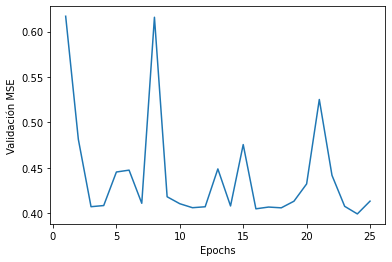

In [111]:
# 3. Confrontar en una gráfica de épocas en el eje de abcisas contra pérdida (MSE) en
# el eje de ordenadas
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

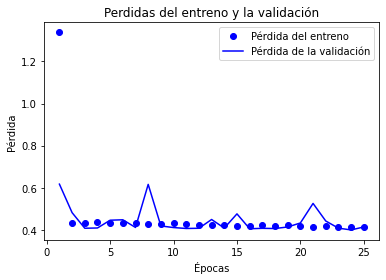

In [112]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

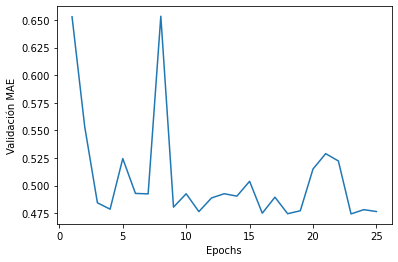

In [113]:
# 4. Confrontar en una gráfica de épocas en el eje de abcisas contra la métrica de 
# error absoluto medio (MAE) 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

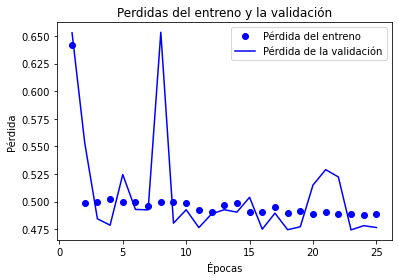

In [114]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [117]:
# 5. Entrenar de nuevo el modelo el número de épocas adecuado para evitar overfitting
mymodel2 = build_model()
history2 = mymodel2.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=5, batch_size=1)

Epoch 1/5
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6588 - mean_absolute_error: 0.6846 - val_loss: 0.5411 - val_mean_absolute_error: 0.5388
Epoch 2/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4300 - mean_absolute_error: 0.4975 - val_loss: 0.4548 - val_mean_absolute_error: 0.4972
Epoch 3/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4251 - mean_absolute_error: 0.4952 - val_loss: 0.4562 - val_mean_absolute_error: 0.5324
Epoch 4/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4281 - mean_absolute_error: 0.4975 - val_loss: 0.4076 - val_mean_absolute_error: 0.4796
Epoch 5/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4233 - mean_absolute_error: 0.4947 - val_loss: 0.4089 - val_mean_absolute_error: 0.4884


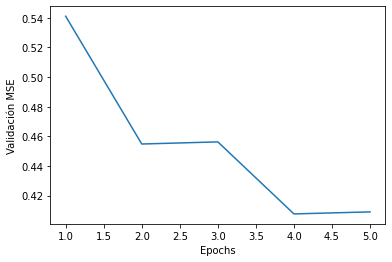

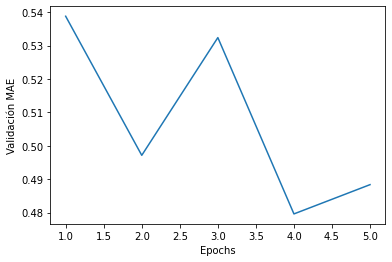

In [118]:
mae_history2 = history2.history['val_mean_absolute_error']
mse_history2 = history2.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history2) + 1), mse_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history2) + 1), mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()